- pandas를 pd라는 이름으로 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

rc("font", family="Malgu Gothic")
get_ipython().run_line_magic("matplotlib","inline") # 주피터에 바로 그래프 그리려고 하는거임

- 긴 파일명을 끝까지 입력하지 말고 적당한 곳에서 TAB 키를 눌러보자
- 한글은 encoding 설정이 필수

In [2]:
CCTV_Seoul = pd.read_csv("data/01. Seoul_CCTV.csv", encoding="utf-8")
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


- 컬럼 이름 조회하기

In [3]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

- 컬럼이름 바꾸기

In [4]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]:"구별"},inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


- 자료를 읽기 시작할 행을 header로 지정
- 읽어올 엑셀의 컬럼을 usecols로 지정

In [5]:
pop_Seoul = pd.read_excel(
    "data/01. Seoul_Population.xls",header=2,usecols="B,D,G,J,N"
)
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


- rename으로 컬럼명 바꾸기

In [6]:
pop_Seoul.rename(
    columns={
        pop_Seoul.columns[0]: "구별",
        pop_Seoul.columns[1]: "인구수",
        pop_Seoul.columns[2]: "한국인",
        pop_Seoul.columns[3]: "외국인",
        pop_Seoul.columns[4]: "고령자",
    },
    inplace=True,
)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


---

In [7]:
pop_Seoul.drop([0],axis=0,inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273
5,광진구,372298,357703,14595,43953


In [8]:
pop_Seoul["외국인비율"]=pop_Seoul["외국인"]/pop_Seoul["인구수"]*100
pop_Seoul["고령자비율"]=pop_Seoul["고령자"]/pop_Seoul["인구수"]*100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118
4,성동구,312711,304808,7903,41273,2.527254,13.198448
5,광진구,372298,357703,14595,43953,3.920247,11.805865


---

### Pandas 데이터프레임 병합 방법
- pd.concat()
- pd.merge()
- pd.join()

- 딕셔너리 안의 리스트 형태

In [9]:
left=pd.DataFrame({
    "key":["K0","K4","K2","K3"],
    "A":["A0","A1","A2","A3"],
    "B":["B0","B1","B2","B3"],
})
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


- 리스트 안의 딕셔너리 형태

In [10]:
right= pd.DataFrame([
    {"key":"K0", "C":"C0","D":"D0"},
    {"key":"K1", "C":"C1","D":"D1"},
    {"key":"K2", "C":"C2","D":"D2"},
    {"key":"K3", "C":"C3","D":"D3"},
])
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


- pd.merge()
    - 두 데이터 프레임에서 컬럼이나 인덱스를 기준으로 잡고 병합
    - 기준이 되는 컬럼이나 인덱스를 키값이라고 한다.
    - 기준은 두 데이터 프레임에 모두 포함되어 있어야 함

In [11]:
pd.merge(left,right,on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [12]:
pd.merge(left,right,how="left",on="key")


,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [13]:
pd.merge(left,right,how="right",on="key")


,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [14]:
pd.merge(left,right,how="outer",on="key")


,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [15]:
CCTV_Seoul.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932


In [16]:
pop_Seoul.head(1)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656


In [17]:
data_result = pd.merge(CCTV_Seoul,pop_Seoul,on="구별")
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,379,99,155,377,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,369,120,138,204,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,388,258,184,81,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,846,260,390,613,520929,503297,17632,70046,3.384722,13.446362


### 열삭제
- del
- drop

In [18]:
del data_result["2013년도 이전"]

In [19]:
del data_result["2014년"]

In [20]:
data_result.head(3)

,구별,소계,2015년,2016년,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,584,932,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,155,377,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,138,204,328002,324479,3523,56530,1.074079,17.234651


In [21]:
data_result.drop(["2015년","2016년"],axis=1,inplace=True)

### 인덱스 변경
- set_index()
- 선택한 컬럼을 데이터 프레임의 인덱스로 지정

In [22]:
data_result.set_index("구별",inplace=True)
data_result.head()

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,
강남구,3238,561052,556164,4888,65060,0.871220,11.596073
강동구,1010,440359,436223,4136,56161,0.939234,12.753458
강북구,831,328002,324479,3523,56530,1.074079,17.234651
강서구,911,608255,601691,6564,76032,1.079153,12.500021
관악구,2109,520929,503297,17632,70046,3.384722,13.446362


### 상관계수
- corrr()
- 상관계수가 0.2 이상인 데이터를 비교

In [23]:
data_result.corr()

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,0.232555,0.227852,0.030421,0.163905,-0.045956,-0.267841
인구수,0.232555,1.000000,0.998151,-0.167243,0.936737,-0.601076,-0.637414
한국인,0.227852,0.998151,1.000000,-0.226853,0.936155,-0.645463,-0.628360
외국인,0.030421,-0.167243,-0.226853,1.000000,-0.175318,0.838612,-0.021147
고령자,0.163905,0.936737,0.936155,-0.175318,1.000000,-0.620300,-0.348840
외국인비율,-0.045956,-0.601076,-0.645463,0.838612,-0.620300,1.000000,0.242816
고령자비율,-0.267841,-0.637414,-0.628360,-0.021147,-0.348840,0.242816,1.000000


In [24]:
data_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   소계      25 non-null     int64  
 1   인구수     25 non-null     int64  
 2   한국인     25 non-null     int64  
 3   외국인     25 non-null     int64  
 4   고령자     25 non-null     int64  
 5   외국인비율   25 non-null     float64
 6   고령자비율   25 non-null     float64
dtypes: float64(2), int64(5)
memory usage: 1.6+ KB


In [25]:
data_result["CCTV비율"]=data_result["소계"]/data_result["인구수"]
data_result["CCTV비율"]=data_result["CCTV비율"]*100

In [26]:
data_result.head()

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,
강남구,3238,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,520929,503297,17632,70046,3.384722,13.446362,0.404854


In [27]:
data_result.sort_values(by="CCTV비율", ascending=True).head()

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,
강서구,911,608255,601691,6564,76032,1.079153,12.500021,0.149773
송파구,1081,671173,664496,6677,76582,0.994825,11.410173,0.161061
중랑구,916,412780,408226,4554,59262,1.103251,14.356800,0.221910
강동구,1010,440359,436223,4136,56161,0.939234,12.753458,0.229358
광진구,878,372298,357703,14595,43953,3.920247,11.805865,0.235833


In [28]:
data_result.sort_values(by="CCTV비율", ascending=False).head()


,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,
종로구,1619,164257,154770,9487,26182,5.775705,15.939656,0.985651
용산구,2096,244444,229161,15283,36882,6.252148,15.088118,0.857456
중구,1023,134593,125709,8884,21384,6.600640,15.887899,0.760069
강남구,3238,561052,556164,4888,65060,0.871220,11.596073,0.577130
금천구,1348,253491,235154,18337,34170,7.233787,13.479769,0.531774


- Pandas에서 plot 그리기

<AxesSubplot:ylabel='구별'>

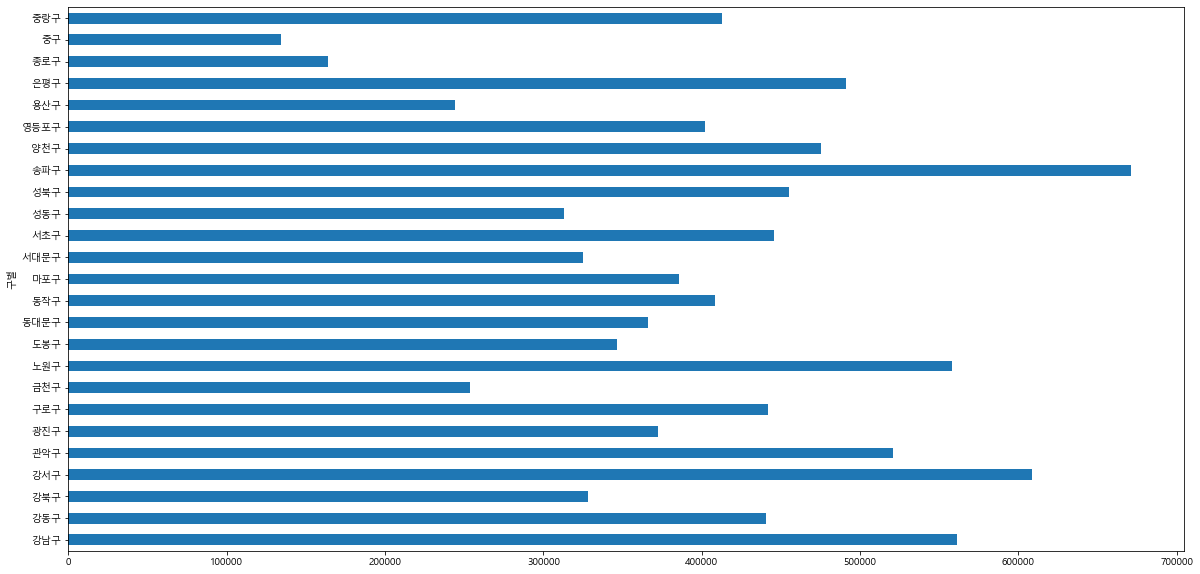

In [33]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

data_result["인구수"].plot(kind="barh",figsize=(20,10))


---

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc

plt.rcParams["axes.unicode_minus"]= False #마이너스 부호 때문에 한글이 깨질 수 있어서 주는 설정
rc("font", family="Malgu Gothic")
get_ipython().run_line_magic("matplotlib","inline") 

In [34]:
data_result.head()

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,
강남구,3238,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,520929,503297,17632,70046,3.384722,13.446362,0.404854


#### 소계 컬럼 시각화

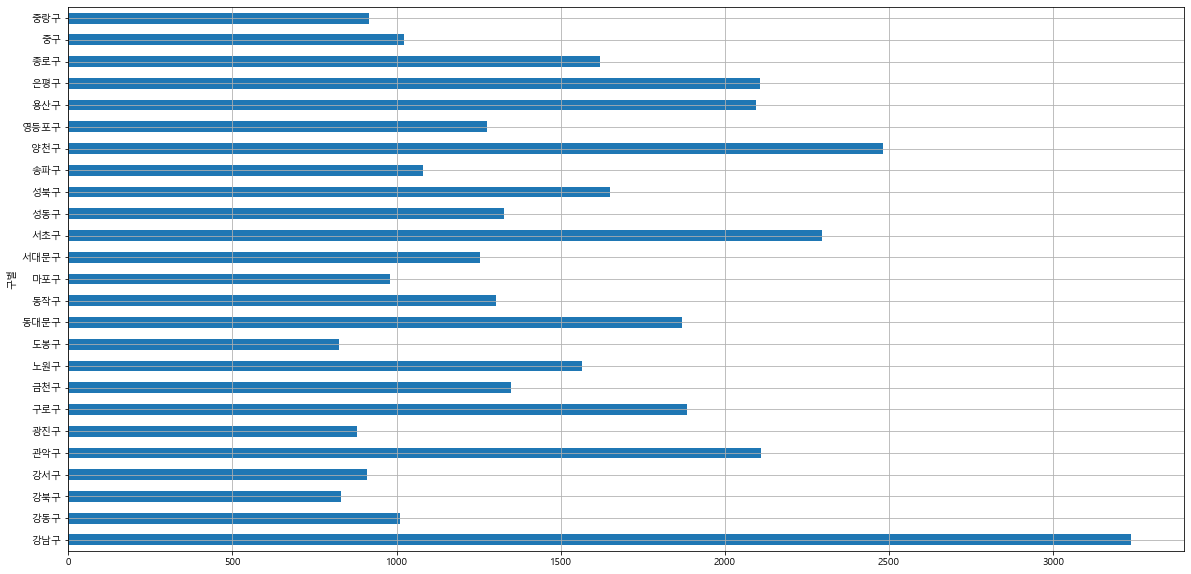

In [39]:
def drowGraph():
    data_result["소계"].plot(
        kind="barh", grid=True, figsize=(20,10));
drowGraph()

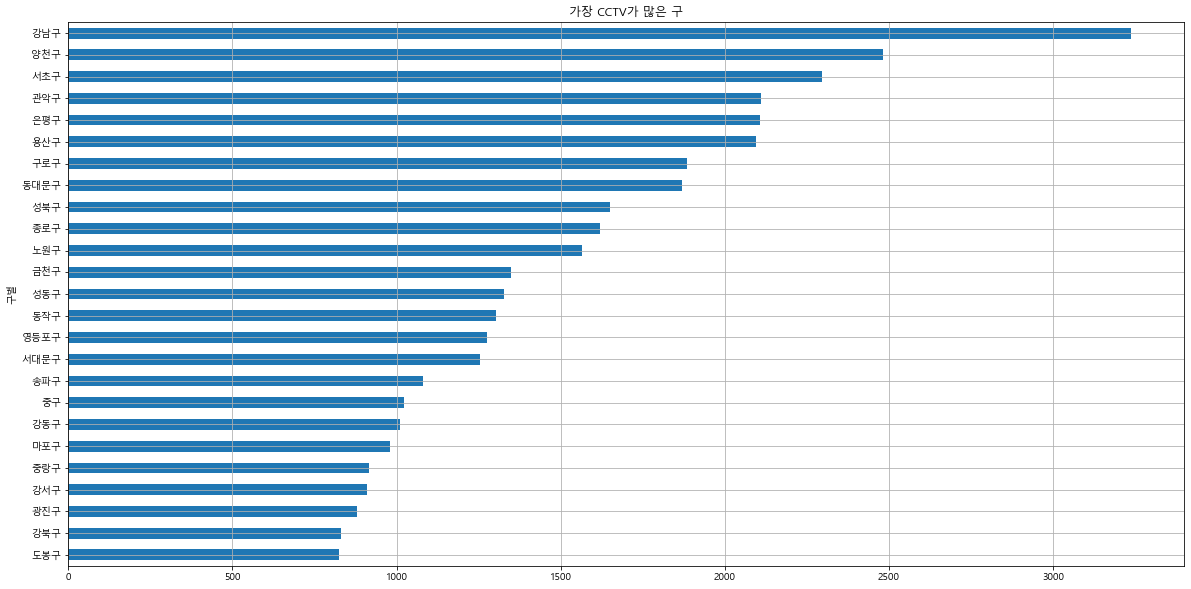

In [42]:
def drowGraph():
    data_result["소계"].sort_values().plot(
        kind="barh", grid=True, title="가장 CCTV가 많은 구",figsize=(20,10));
drowGraph()

In [43]:
data_result.head()

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,
강남구,3238,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,520929,503297,17632,70046,3.384722,13.446362,0.404854


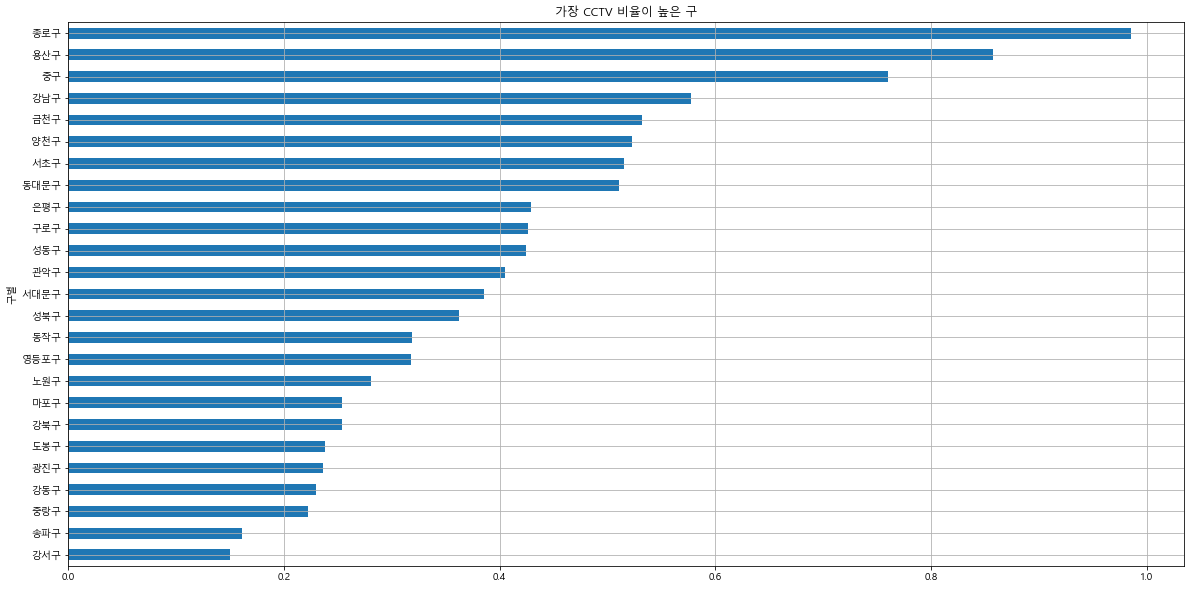

In [44]:
def drowGraph():
    data_result["CCTV비율"].sort_values().plot(
        kind="barh", grid=True, title="가장 CCTV 비율이 높은 구",figsize=(20,10));
drowGraph()

---

- 인구수와 소계 컬럼으로 scatter plot 그리기

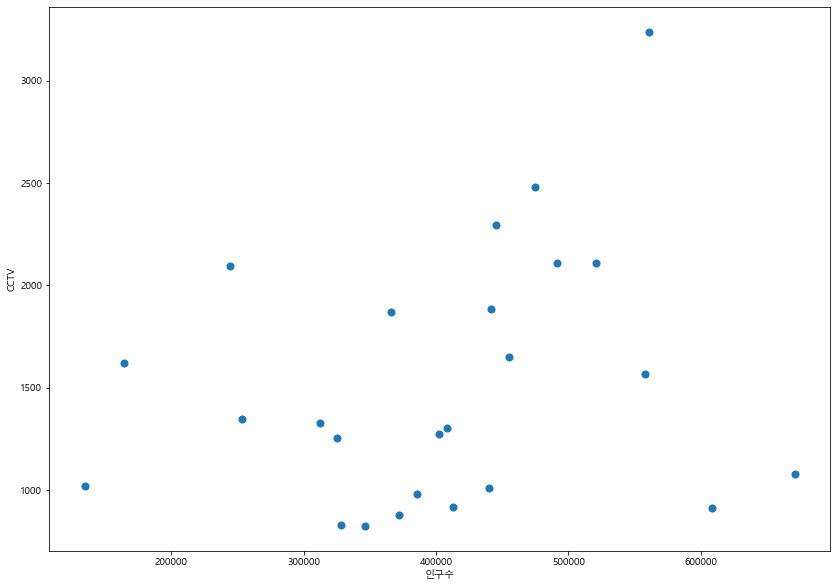

In [45]:
def drawGraph():
    plt.figure(figsize=(14,10))
    plt.scatter(data_result["인구수"], data_result["소계"], s=50)
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.show
drawGraph()

#### Numpy를 이용한 1차직선 만들기
- np.polyfit() : 직선을 구성하기 위한 계수를 계산
- np.poly1d(): polyfit으로 찾은 계수로 파이썬에서 사용할 수 있는 함수로 만들어주는 기능


In [47]:
import numpy as  np

In [50]:
fp1 = np.polyfit(data_result["인구수"],data_result["소계"],1)
fp1

array([1.11155868e-03, 1.06515745e+03])

In [52]:
f1 = np.poly1d(fp1)
f1

poly1d([1.11155868e-03, 1.06515745e+03])

In [53]:
f1(400000)

1509.7809252413338

- 인구가 40만인 구에서 서울시의 전체 경향에 맞는 적당한 CCTV 수는?

In [55]:
fx = np.linspace(100000,700000,100)

- 경향선을 그리기 위한 x 데이터 생성
- np.linspace(a,b,n) : a부터 b까지 n개의 등간격 데이터 생성

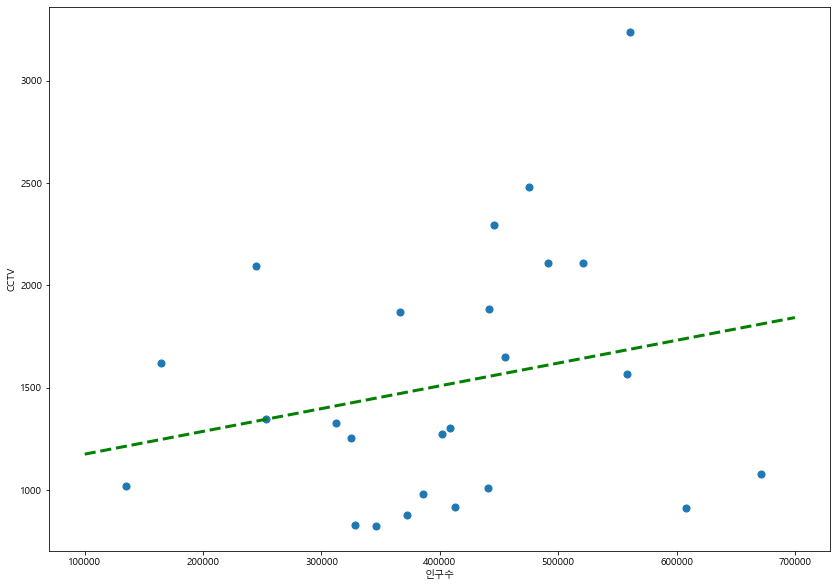

In [56]:
def drawGraph():
    plt.figure(figsize=(14,10))
    plt.scatter(data_result["인구수"], data_result["소계"], s=50)
    plt.plot(fx,f1(fx), ls="dashed", lw=3, color="g")
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.show
drawGraph()

### 강조하고 싶은 데이터를 시각화하기

#### 그래프 다듬기
#### 경향과의 오차 만들기
- 경향(trend)과의 오차를 만들자
- 경향 f1 함수에 해당 인구를 입력
- f1(data_result["인구수"]

In [57]:
fp1 = np.polyfit(data_result["인구수"], data_result["소계"],1)
fl= np.poly1d(fp1)
fx=np.linspace(100000,700000,100)

In [58]:
data_result["오차"] = data_result["소계"]-f1(data_result["인구수"])

In [59]:
data_result.head(1)

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,
강남구,3238,561052,556164,4888,65060,0.87122,11.596073,0.57713,1549.200326


In [60]:
# 경향과 비교해서 데이터의 오차가 너무 나는 데이터를 계산

df_sort_f = data_result.sort_values(by="오차",ascending=False) #내림차순
df_sort_t = data_result.sort_values(by="오차",ascending=True) #오름차순

In [61]:
df_sort_f.head() #경향대비 CCTV를 많이 가진구

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,
강남구,3238,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
양천구,2482,475018,471154,3864,55234,0.813443,11.627770,0.522507,888.832166
용산구,2096,244444,229161,15283,36882,6.252148,15.088118,0.857456,759.128697
서초구,2297,445401,441102,4299,53205,0.965198,11.945415,0.515715,736.753199
은평구,2108,491202,486794,4408,74559,0.897390,15.178888,0.429151,496.842700


In [63]:
df_sort_t.head() #경향대비 CCTV를 많이 가진구


,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,
강서구,911,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
송파구,1081,671173,664496,6677,76582,0.994825,11.410173,0.161061,-730.205628
도봉구,825,346234,344166,2068,53488,0.597284,15.448512,0.238278,-625.016861
중랑구,916,412780,408226,4554,59262,1.103251,14.356800,0.221910,-607.986645
광진구,878,372298,357703,14595,43953,3.920247,11.805865,0.235833,-600.988527


C:\Users\koki2\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


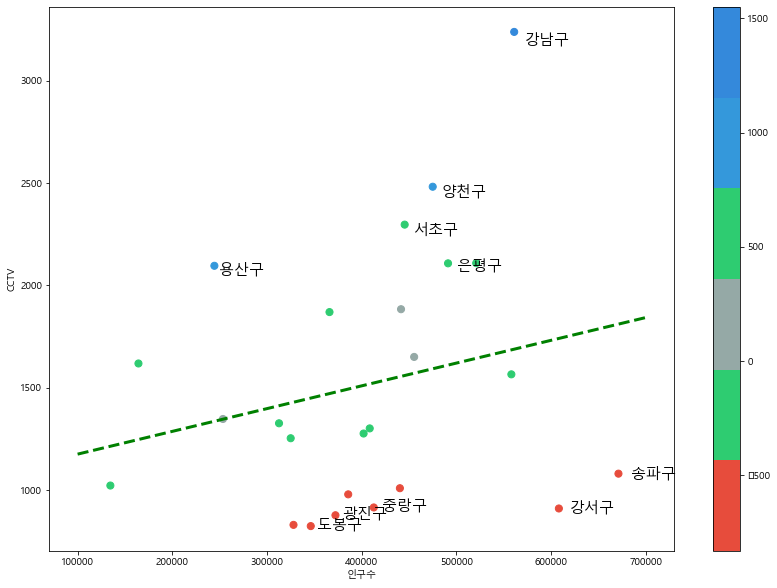

In [74]:
from matplotlib.colors import ListedColormap
color_step = ["#e74c3c","#2ecc71","#95a9a6","#2ecc71","#3498db","#3489db"]
my_cmap = ListedColormap(color_step)
def drawGraph():
    plt.figure(figsize=(14,10))
    plt.scatter(data_result["인구수"], data_result["소계"], s=50, c=data_result["오차"],cmap=my_cmap)
    plt.plot(fx,f1(fx), ls="dashed", lw=3, color="g")


    for n in range(5):
        # 상위 5개
        plt.text(
            df_sort_f["인구수"][n]*1.02,
            df_sort_f["소계"][n]*0.98,
            df_sort_f.index[n], 
            fontsize=15,
        )
        # 하위 5개
        plt.text(
            df_sort_t["인구수"][n]*1.02,
            df_sort_t["소계"][n]*0.98,
            df_sort_t.index[n], 
            fontsize=15,
        )

    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.colorbar()
    plt.show()
drawGraph()

In [75]:
data_result.to_csv("data/01. CCTV_my.csv",sep=",",encoding="utf-8")